In [1]:
from tensorflow.keras import datasets,models,layers
import pandas
import matplotlib.pyplot as plt
import numpy
from sklearn.preprocessing import MinMaxScaler


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data=pandas.read_csv(r"F:\MLIoT\ML\dataset\international-airline-passengers.csv",
                     skipfooter=3)
data['Month']=pandas.to_datetime(data['Month'])
data.index=data['Month']
data.drop(['Month'],axis=1,inplace=True)
data.columns=['volume']
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,volume
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
data['ip']=data['volume'].shift(1)
data=data[['ip','volume']]
data.dropna(inplace=True)
mm=MinMaxScaler()
data2=mm.fit_transform(data)
data2

array([[0.01544402, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984556],
       [0.05984556, 0.08494208],
       [0.08494208, 0.08494208],
       [0.08494208, 0.06177606],
       [0.06177606, 0.02895753],
       [0.02895753, 0.        ],
       [0.        , 0.02702703],
       [0.02702703, 0.02123552],
       [0.02123552, 0.04247104],
       [0.04247104, 0.07142857],
       [0.07142857, 0.05984556],
       [0.05984556, 0.04054054],
       [0.04054054, 0.08687259],
       [0.08687259, 0.12741313],
       [0.12741313, 0.12741313],
       [0.12741313, 0.1042471 ],
       [0.1042471 , 0.05598456],
       [0.05598456, 0.01930502],
       [0.01930502, 0.06949807],
       [0.06949807, 0.07915058],
       [0.07915058, 0.08880309],
       [0.08880309, 0.14285714],
       [0.14285714, 0.11389961],
       [0.11389961, 0.13127413],
       [0.13127413, 0.14285714],
       [0.14285714, 0.18339768],
       [0.

In [4]:
train=data2[:110,:]
test=data2[110:,:]
xtrain=train[:,0]
xtest=test[:,0]
ytrain=train[:,1]
ytest=test[:,1]

In [5]:
# input format = (samples,timestamps,features)
xtrain=xtrain.reshape(110,1,1)
xtest=xtest.reshape(33,1,1)

# LSTM

In [6]:
#start with a Neural Network
model=models.Sequential()

In [7]:
model.add(layers.LSTM(units=5,activation='tanh',input_shape=(1,1)))

In [8]:
model.add(layers.Dense(1))

In [9]:
from sklearn.metrics import mean_squared_error,r2_score
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
model.fit(xtrain,ytrain,epochs=100,verbose=True)

Epoch 1/100
110/110 [==============================] - 2s 21ms/step - loss: 0.0694
Epoch 2/100
110/110 [==============================] - 0s 299us/step - loss: 0.0663
Epoch 3/100
110/110 [==============================] - 0s 308us/step - loss: 0.0630
Epoch 4/100
110/110 [==============================] - 0s 290us/step - loss: 0.0598
Epoch 5/100
110/110 [==============================] - 0s 290us/step - loss: 0.0567
Epoch 6/100
110/110 [==============================] - 0s 272us/step - loss: 0.0536
Epoch 7/100
110/110 [==============================] - 0s 254us/step - loss: 0.0507
Epoch 8/100
110/110 [==============================] - 0s 281us/step - loss: 0.0478
Epoch 9/100
110/110 [==============================] - 0s 272us/step - loss: 0.0452
Epoch 10/100
110/110 [==============================] - 0s 281us/step - loss: 0.0425
Epoch 11/100
110/110 [==============================] - 0s 290us/step - loss: 0.0402
Epoch 12/100
110/110 [==============================] - 0s 272us/step - los

110/110 [==============================] - 0s 263us/step - loss: 0.0075
Epoch 98/100
110/110 [==============================] - 0s 263us/step - loss: 0.0074
Epoch 99/100
110/110 [==============================] - 0s 245us/step - loss: 0.0072
Epoch 100/100
110/110 [==============================] - 0s 218us/step - loss: 0.0071


In [11]:
from sklearn.metrics import r2_score
ypred=model.predict(xtest)
r2_score(ytest,ypred)

-0.7438209766472614

In [34]:
ypred=numpy.zeros((143)).reshape(143,1)
ypred[:110,0]=numpy.nan
ypred[110:,0]=model.predict(xtest)[:,0]

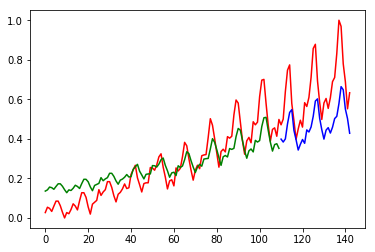

In [35]:
plt.plot(data2[:,1],'r')
plt.plot(model.predict(xtrain),'g')
plt.plot(ypred,'b')
plt.show()

In [18]:
ypred.shape

(143,)

In [24]:
xtest[:,0].shape

(33, 1)

TypeError: 'float' object is not callable